## Model Introduction 

### Python Study

In [1]:
# pip install pymc3;

In [2]:
# pip install seaborn

In [3]:
%pylab inline 
# magic fucntion in ipython. It loads major numerical and plotting libraries

import pandas as pd

import pymc3 as pm
# probabilistic programming language

# import class for constructing random walks
from pymc3.distributions.timeseries import GaussianRandomWalk
import theano.tensor as tt

#import some special methods
from scipy.special import logit,expit
import scipy.stats as stats

# set some plotting parameters to create ggplot-style plots
import seaborn as sns
import matplotlib as mpl
sns.set_context(context='talk',font_scale=1.5)
plt.style.use('ggplot')
mpl.rcParams['axes.labelsize'] = 24

#interactive plotting tools
from ipywidgets import interactive

Populating the interactive namespace from numpy and matplotlib


In [4]:
N, p = 10000, 0.01
x = np.random.binomial(N,p,size=1000)

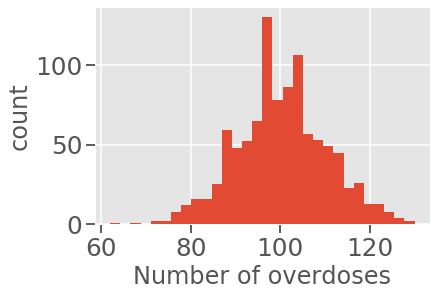

In [5]:
plt.figure(); # ; on plt suppress output
plt.hist(x, bins=30);
plt.xlabel("Number of overdoses");
plt.ylabel("count");

**Important: Shift + tap shows me info about method.**

In [6]:
n_months =12
n_samples = 1000
N,p = 10000,0.01
x = np.random.binomial(N,p, size = (n_samples,n_months))

print('Data generated is a {} by {} array'.format(*x.shape))

Data generated is a 1000 by 12 array


In [7]:
def plot_data_timeseries(ys, x=None, xlabel="time", ylabel="Overdoses", new_plot=True, color="#E14A33", label=None):
    
    '''
    brief intro: plot 95 and IQR
    parameters:
    -----
    ys: sample size by time numpy array 
    x: x axis as time
    xlabel: string
    ylabel: string
    new_plot: boolean
        plotting to a new figure or not
    color: str
    label: str
    return
    -----
    
    
    '''
    if x is None:
        x = np.arange(1,ys.shape[1]+1)
    
    if new_plot: plt.figure;
        # if we wanna make a new plot, then by using plt.figure function,
        # we create a new plot figure
        
    lc, liqr, m, uiqr, uc = np.percentile(ys, [2.5,25,50,75,97.5], axis=0);
    # now it's time to use the (already) existing plot figure
    plt.fill_between(x, lc, uc,alpha=0.2 ,color=color);
    plt.fill_between(x, liqr, uiqr, color=color, alpha=0.2);
    plt.plot(x,m, color= color, label = label);
    plt.xlabel(xlabel);plt.ylabel(ylabel);
    
    

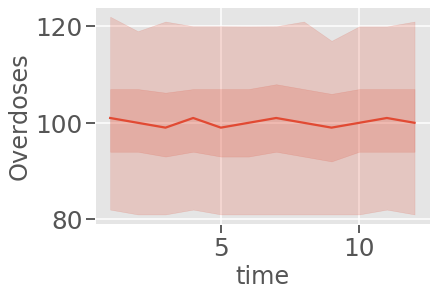

In [8]:
plot_data_timeseries(x)

Broadcasting rule is how numpy treat different arrays in dimensions.

In [9]:
# Note: array is a function to yield a ndarray conviniently, and .flatten() is a method to
# flat the dimension.

np.array([[1,2,3],[1,2,3]]).flatten()

array([1, 2, 3, 1, 2, 3])

In [10]:
# Note: broadcasting rule examples
x = np.arange(4)
# print(x)
xx=x.reshape(4,1)
# print(xx)
y = np.ones(5)
# print(y)
z = np.ones((3,4))
# print(z)

# print(xx+y)
print(x[:,np.newaxis]+y)
print(x+z)

# outer product
a = np.array([5,6,7,8])
b = np.array([1,2,3])

# 4 X 1
#     3
# 4 X 3
print(shape(a))
print(shape(b))
print(shape(a.flatten()))
print(shape(a[:, np.newaxis].flatten()))
print(type(a))
print(a[:, np.newaxis] + b) # This is outer product, where the summatiion
# occurs elementwise from two vectors.

[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]
[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]
(4,)
(3,)
(4,)
(4,)
<class 'numpy.ndarray'>
[[ 6  7  8]
 [ 7  8  9]
 [ 8  9 10]
 [ 9 10 11]]


In [11]:
# Let's make a overdose_generation function.

# instruction: numpy docstring guide.

def overdose_generation():
    '''
    give uncertainty to parameters of the number of overdoses
    
    parameter
    -----
    
    return
    ----
    
    
    '''
    n_samples = 1000
    n_months = 12
    # N follows normal(10000,1000), (1000, 1 )
    N = np.random.normal(loc = 10000, scale = np.sqrt(1000), 
                         size=(n_samples,1)).astype(int)
    # p follows beta (1, 99) (1000, 1 )
    p_alpha, p_beta = 1, 99
    p = np.random.beta(a=1, b=99, size = (n_samples,1))
    # apply N and p to Bin(N,p).  (10000, 12). use Broadcasting rule
    # For each Bin(N,p), repeat 1000 times for one column (month)
    x = np.random.binomial(N, p, size = (n_samples,n_months))
    # (1000,12) ndarray is our result.
    return {'N' : N.flatten(), 'p' : p.flatten(), 'x' : x}
    # Dict: N, p, x for keys, flatten N, p, values.
    

In [12]:
## Note that we can assign variables in a line 
# a,b,c,d = 1,2,3,4
# print(a,b,c,d)

In [13]:
# N = np.random.normal(loc = 10000, scale = np.sqrt(1000), 
#                          size=(1000,1))
# shape(N.astype(int))
# print
# (type(N.astype(int)[0,0]),
# type(N[0,0]))

Note that we get 
TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'
This is why we change our N to N.astype(int). Match the type of parameter of a function.

In [14]:
data = overdose_generation()
data['N'];

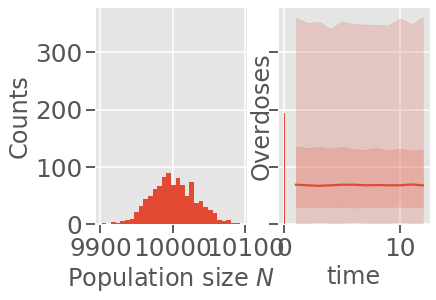

In [15]:
f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.hist(data['N'],bins=30);
ax1.set_ylabel('Counts');
ax1.set_xlabel('Population size $N$');

ax2.hist(data['p'],bins=30);
ax2.set_xlabel('overdose pervalence $p$');

plot_data_timeseries(data['x'])

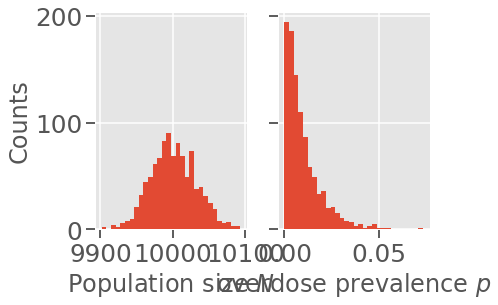

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.hist(data['N'],bins=30);
ax1.set_ylabel('Counts');
ax1.set_xlabel('Population size $N$');

ax2.hist(data['p'],bins=30);
ax2.set_xlabel('overdose prevalence $p$');



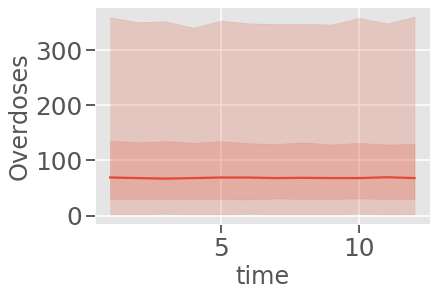

In [18]:
plot_data_timeseries(data['x'])

# Why this happening? 